In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Unsupervised learning & clustering
----
### 1. Reading data
The worldbank_jobs_2016.tsv (can be found in the same folder with this notebook) file contains the Jobs (and other) data for the 2016 year, downloaded from The World Bank's webpage.

- Look at the data in any text editor. Build up an overall sense how the data is built up and how the missing values are represented.
- Read the file into a pandas dataframe and tell pandas the delimiter (or separator) that separates the columns and which special pattern means if a value is missing.
- Keep only those rows, which represents countries, at the end there are some useless rows (with missing country code).
- The data is in a long format. Convert it into a wide format, where each row is a single country (with country code) and the column names are the features i.e. the Series Codes, the values in the columns are the measured values of the 2016 [YR 2016 column]. (eg the first column is 'EG.CFT.ACCS.ZS', the second is 'EG.ELC.ACCS.ZS'. Order of the columns does not matter)! Try to use the pivot method.
- Check that the features are in numeric format (dtypes), this will be needed for modeling!
-----

In [2]:
df = pd.read_csv('02_dataset_worldbank_jobs_2016.tsv',delimiter='\t')

In [3]:
df = df.dropna().reset_index()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36022 entries, 0 to 36021
Data columns (total 6 columns):
index            36022 non-null int64
Country Name     36022 non-null object
Country Code     36022 non-null object
Series Name      36022 non-null object
Series Code      36022 non-null object
2016 [YR2016]    36022 non-null object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


after investigation, found out that missing data is represented by ".."

In [5]:
df[df["2016 [YR2016]"] == ".."]

,index,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
23,23,Afghanistan,AFG,Ease of doing business index (1=most business-...,IC.BUS.EASE.XQ,..
24,24,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,..
45,45,Afghanistan,AFG,Fuel exports (% of merchandise exports),TX.VAL.FUEL.ZS.UN,..
50,50,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,..
51,51,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,..
...,...,...,...,...,...,...
36003,36003,Zimbabwe,ZWE,"Unemployment with advanced education, female (...",SL.UEM.ADVN.FE.ZS,..
36004,36004,Zimbabwe,ZWE,"Unemployment with advanced education, male (% ...",SL.UEM.ADVN.MA.ZS,..
36005,36005,Zimbabwe,ZWE,Unemployment with intermediate education (% of...,SL.UEM.INTM.ZS,..
36006,36006,Zimbabwe,ZWE,"Unemployment with intermediate education, fema...",SL.UEM.INTM.FE.ZS,..


In [6]:
pivoted_df = df.pivot(index='Country Code', columns='Series Code', values='2016 [YR2016]')
pivoted_df

Series Code,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,..,71743528.4916201,..,5787158.10055866,..,95.5701446533203,..,582.344444444444,126.019533027619,..,...,104822,59547,56.808,45275,43.192,4.9181484453,5.797836151,0.105049448266972,11.88815623,3.75873566084448
AFG,-0.0758945950132622,118216397.348387,0.480709517928724,277483515.060727,..,84.1371383666992,..,53.0834053242655,1.07421538203442,3.05195383587665,...,34656032,25985093,74.98,8670939,25.02,0.262056153,185.0455137,..,434.3793696,..
AGO,2.88213834819657,1176110313.56,4.30516364069576,3988048.38,..,40.5206069946289,..,23.1117855137563,..,18.1587749690844,...,28813463,10329915,35.851,18483548,64.149,..,223.0964467,..,344.7317258,..
ALB,0.0592091751160614,147128144.977279,8.78673446886916,996001354.462477,..,100,..,104.967189781022,33.8068122098151,157.797944425991,...,2876101,1195854,41.579,1680247,58.421,2.9414365045,556.6603641,11.1789815992628,750.385083,0.647750656841347
AND,..,..,..,..,..,100,..,164.427659574468,..,..,...,77281,9082,11.752,68199,88.248,..,149.8840596,..,186.0462838,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,0.700565756032146,66734849.5572601,3.62936692691499,764488042.103565,..,100,..,166.822816202811,38.3268809808933,74.7521025414702,...,1816200,..,..,..,..,..,..,..,..,..
YEM,0.191606931501499,..,-3.08016185948595,..,..,71.6423492431641,..,52.2457961626608,..,..,...,27584213,17821057,64.606,9763156,35.394,..,11.12988709,..,24.5158127,..
ZAF,1.5182706815113,896870556.213536,0.749015048767685,..,321.649882279292,84.2,..,46.1758591695587,69.2897894314741,..,...,56015473,19414403,34.659,36601070,65.341,8.6167994168,156.2443961,9.98146418269729,250.445219,5.29205550382907


### 2. Data preprocessing and inspection
- Visualize the missing values!
- Keep only those countries which has less than 60 missing features in the original table.
- After this drop all features which have missing values for the remaining countries. (Imputation would also work but may introduce a bias because there is less data for less developed countries generally.)
- How many counties and features do we have left?
- Read the kept features' descriptions. In the original table the Series Name describe the meaning of the features. What do you think, based only on these information, which counties are the most similar to Hungary? And Greece?
------

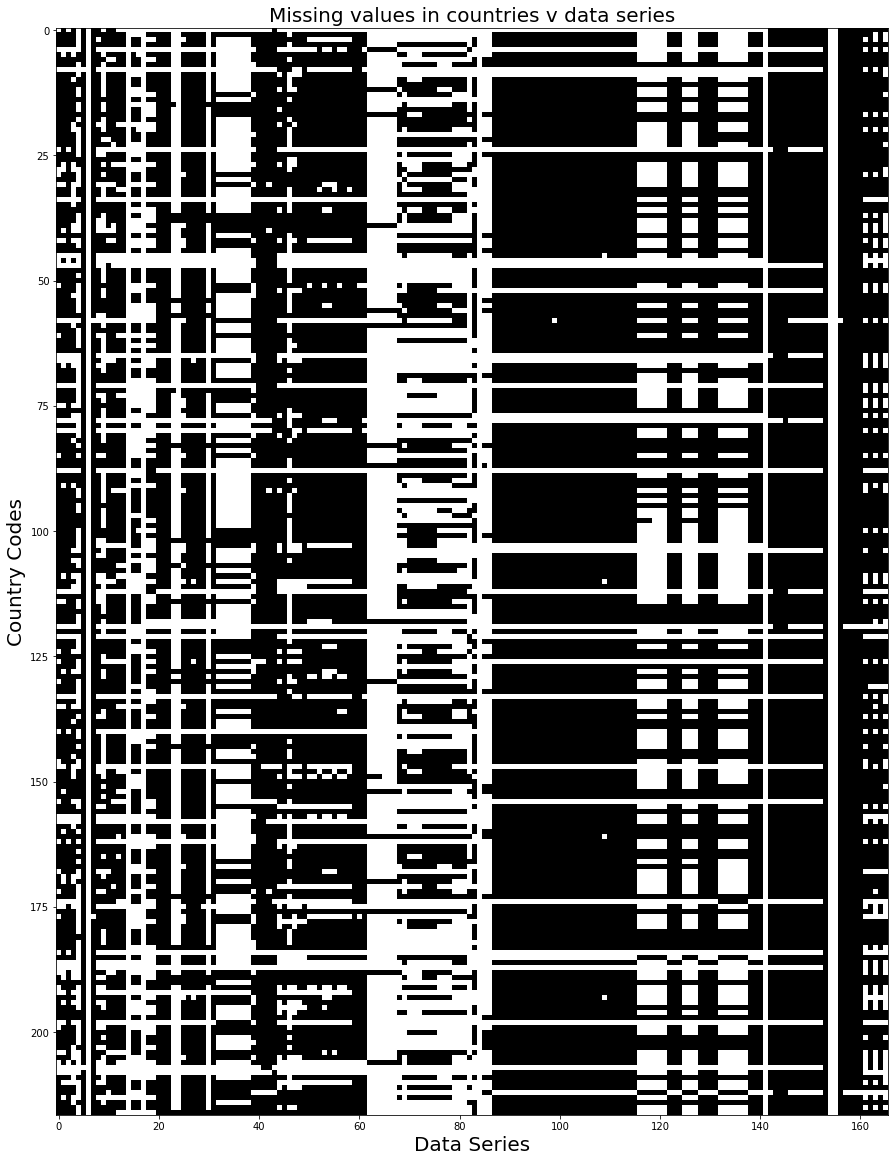

In [7]:
plt.figure(figsize=(30, 20))
plt.title('Missing values in countries v data series', fontsize=20)
plt.ylabel('Country Codes', fontsize=20)
plt.xlabel('Data Series', fontsize=20)
plt.imshow((pivoted_df== '..'), cmap='gist_heat')

In [8]:
pivoted_df.index[0]
dropped_pivot = pivoted_df.copy()

In [9]:
for iCntry in range(np.shape(pivoted_df)[0]):
    if(np.unique(pivoted_df.values[iCntry] == '..', return_counts=True)[1][1] >= 60):
        #drop the row which has more than or equal to 60
        dropped_pivot.drop(pivoted_df.index[iCntry], inplace=True)

In [10]:
dropped_pivot

Series Code,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,-0.0758945950132622,118216397.348387,0.480709517928724,277483515.060727,..,84.1371383666992,..,53.0834053242655,1.07421538203442,3.05195383587665,...,34656032,25985093,74.98,8670939,25.02,0.262056153,185.0455137,..,434.3793696,..
ALB,0.0592091751160614,147128144.977279,8.78673446886916,996001354.462477,..,100,..,104.967189781022,33.8068122098151,157.797944425991,...,2876101,1195854,41.579,1680247,58.421,2.9414365045,556.6603641,11.1789815992628,750.385083,0.647750656841347
ARE,4.40039691194953,..,2.51668651639507,..,62.0183337934548,100,..,110.880526315789,65.683037189653,..,...,9269612,1300990,14.035,7968622,85.965,5.5351682242,132.6684666,20.2288541979265,533.5579454,2.32146635303879
ARG,0.321978137189706,823565671.520054,0.587564212452168,352639302.322353,11.4625324986418,100,..,16.0220668033281,60.1037381390599,393.196311620749,...,43847430,3671345,8.373,40176085,91.627,8.478811845,124.3660983,2.53245061230712,219.1746707,8.79281472735163
ARM,0.627751723837743,358015507.114938,3.20605773747274,608660930.8121,..,100,..,102.733263083948,61.139439335971,..,...,2924816,1079784,36.918,1845032,63.082,4.8953531596,355.6565539,3.8219981779404,609.0074779,5.93860928912599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,1.95383604019208,18058170.8249882,0.321022637394075,132604667.983912,..,100,..,68.9487632508834,47.0767757278638,123.966137188218,...,195125,158674,81.319,36451,18.681,4.6171483859,65.79322959,21.4788157608196,86.21538462,0.852263362981328
YEM,0.191606931501499,..,-3.08016185948595,..,..,71.6423492431641,..,52.2457961626608,..,..,...,27584213,17821057,64.606,9763156,35.394,..,11.12988709,..,24.5158127,..
ZAF,1.5182706815113,896870556.213536,0.749015048767685,..,321.649882279292,84.2,..,46.1758591695587,69.2897894314741,..,...,56015473,19414403,34.659,36601070,65.341,8.6167994168,156.2443961,9.98146418269729,250.445219,5.29205550382907


In [11]:
dropped_pivot.drop(columns=dropped_pivot.columns[0])

Series Code,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,FP.CPI.TOTL,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,118216397.348387,0.480709517928724,277483515.060727,..,84.1371383666992,..,53.0834053242655,1.07421538203442,3.05195383587665,137.904563672559,...,34656032,25985093,74.98,8670939,25.02,0.262056153,185.0455137,..,434.3793696,..
ALB,147128144.977279,8.78673446886916,996001354.462477,..,100,..,104.967189781022,33.8068122098151,157.797944425991,112.834428489197,...,2876101,1195854,41.579,1680247,58.421,2.9414365045,556.6603641,11.1789815992628,750.385083,0.647750656841347
ARE,..,2.51668651639507,..,62.0183337934548,100,..,110.880526315789,65.683037189653,..,111.115725679973,...,9269612,1300990,14.035,7968622,85.965,5.5351682242,132.6684666,20.2288541979265,533.5579454,2.32146635303879
ARG,823565671.520054,0.587564212452168,352639302.322353,11.4625324986418,100,..,16.0220668033281,60.1037381390599,393.196311620749,..,...,43847430,3671345,8.373,40176085,91.627,8.478811845,124.3660983,2.53245061230712,219.1746707,8.79281472735163
ARM,358015507.114938,3.20605773747274,608660930.8121,..,100,..,102.733263083948,61.139439335971,..,123.014933984404,...,2924816,1079784,36.918,1845032,63.082,4.8953531596,355.6565539,3.8219981779404,609.0074779,5.93860928912599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,18058170.8249882,0.321022637394075,132604667.983912,..,100,..,68.9487632508834,47.0767757278638,123.966137188218,109.762507807415,...,195125,158674,81.319,36451,18.681,4.6171483859,65.79322959,21.4788157608196,86.21538462,0.852263362981328
YEM,..,-3.08016185948595,..,..,71.6423492431641,..,52.2457961626608,..,..,..,...,27584213,17821057,64.606,9763156,35.394,..,11.12988709,..,24.5158127,..
ZAF,896870556.213536,0.749015048767685,..,321.649882279292,84.2,..,46.1758591695587,69.2897894314741,..,138.859306590936,...,56015473,19414403,34.659,36601070,65.341,8.6167994168,156.2443961,9.98146418269729,250.445219,5.29205550382907


In [12]:
np.unique(dropped_pivot.values[0] == '..', return_counts=True, return_index=True)

(array([False,  True]), array([0, 4]), array([111,  55]))

In [13]:
dropped_pivot.drop(columns=dropped_pivot.columns[dropped_pivot.values[0] == '..'])

Series Code,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,EG.ELC.ACCS.ZS,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,FP.CPI.TOTL,FP.CPI.TOTL.ZG,...,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.MRCH.XD.WD
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,-0.0758945950132622,118216397.348387,0.480709517928724,277483515.060727,84.1371383666992,53.0834053242655,1.07421538203442,3.05195383587665,137.904563672559,2.169452176,...,86.5709321507136,2.6891634730922,34656032,25985093,74.98,8670939,25.02,0.262056153,185.0455137,434.3793696
ALB,0.0592091751160614,147128144.977279,8.78673446886916,996001354.462477,100,104.967189781022,33.8068122098151,157.797944425991,112.834428489197,1.282798834,...,44.0015401014685,-0.159880412127734,2876101,1195854,41.579,1680247,58.421,2.9414365045,556.6603641,750.385083
ARE,4.40039691194953,..,2.51668651639507,..,100,110.880526315789,65.683037189653,..,111.115725679973,1.617876882,...,17.6081783608388,1.25175905246942,9269612,1300990,14.035,7968622,85.965,5.5351682242,132.6684666,533.5579454
ARG,0.321978137189706,823565671.520054,0.587564212452168,352639302.322353,100,16.0220668033281,60.1037381390599,393.196311620749,..,..,...,56.5422464275751,0.984741905647839,43847430,3671345,8.373,40176085,91.627,8.478811845,124.3660983,219.1746707
ARM,0.627751723837743,358015507.114938,3.20605773747274,608660930.8121,100,102.733263083948,61.139439335971,..,123.014933984404,-1.271210454,...,44.8949433189816,0.269302288175516,2924816,1079784,36.918,1845032,63.082,4.8953531596,355.6565539,609.0074779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,1.95383604019208,18058170.8249882,0.321022637394075,132604667.983912,100,68.9487632508834,47.0767757278638,123.966137188218,109.762507807415,1.30385728,...,73.3750944066818,0.702526006807934,195125,158674,81.319,36451,18.681,4.6171483859,65.79322959,86.21538462
YEM,0.191606931501499,..,-3.08016185948595,..,71.6423492431641,52.2457961626608,..,..,..,..,...,75.9001725764795,2.45150204297636,27584213,17821057,64.606,9763156,35.394,..,11.12988709,24.5158127
ZAF,1.5182706815113,896870556.213536,0.749015048767685,..,84.2,46.1758591695587,69.2897894314741,..,138.859306590936,6.3262638,...,52.4085780041956,1.30137401321457,56015473,19414403,34.659,36601070,65.341,8.6167994168,156.2443961,250.445219


In [14]:
for iCntry in range(np.shape(dropped_pivot)[0]):
    dropped_pivot.drop(columns=dropped_pivot.columns[dropped_pivot.values[iCntry] == '..'],inplace=True)

Check if our method was OK

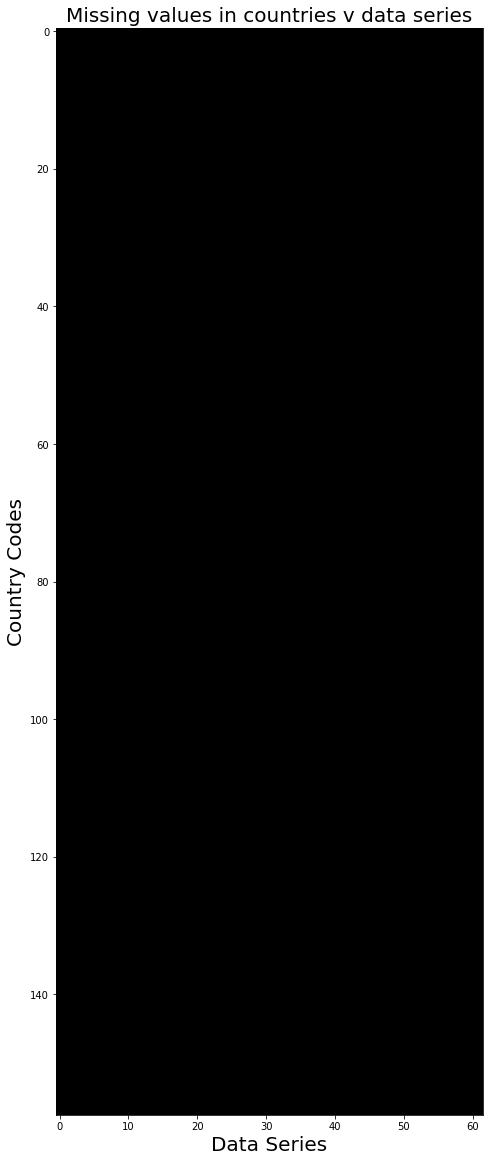

In [15]:
plt.figure(figsize=(30, 20))
plt.title('Missing values in countries v data series', fontsize=20)
plt.ylabel('Country Codes', fontsize=20)
plt.xlabel('Data Series', fontsize=20)
plt.imshow((dropped_pivot== '..'), cmap='gist_heat')

In [16]:
dropped_pivot.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, AFG to ZWE
Columns: 62 entries, BX.KLT.DINV.WD.GD.ZS to SP.URB.TOTL.IN.ZS
dtypes: object(62)
memory usage: 77.8+ KB


In [17]:
for iSerie in range(np.shape(dropped_pivot.columns)[0]):
    print(df[df['Series Code'] == dropped_pivot.columns[iSerie]]['Series Name'].values[0])

Foreign direct investment, net inflows (% of GDP)
Access to electricity (% of population)
Population density (people per sq. km of land area)
Mobile cellular subscriptions (per 100 people)
Telephone lines (per 100 people)
Individuals using the Internet (% of population)
GDP growth (annual %)
Employment in agriculture, female (% of female employment) (modeled ILO estimate)
Employment in agriculture, male (% of male employment) (modeled ILO estimate)
Employment in agriculture (% of total employment) (modeled ILO estimate)
Employers, female (% of female employment) (modeled ILO estimate)
Employers, male (% of male employment) (modeled ILO estimate)
Employers, total (% of total employment) (modeled ILO estimate)
Own-account workers, female (% of female employment) (modeled ILO estimate)
Own-account workers, male (% of male employment) (modeled ILO estimate)
Own-account workers, total (% of male employment) (modeled ILO estimate)
Self-employed, female (% of female employment) (modeled ILO e

### 3. PCA
- Perform PCA with 3 principal components on the filtered, imputed data (from now on, data refers to the filtered, imputed dataset)
- Plot the three embedded 2D combination next to each other (0 vs 1, 0 vs 2 and 1 vs 2)
- It seems that the embedding is really dominated by a single direction. Normalize the data (each feature should have zero mean and unit variance after normalization) and re-do the PCA and the plotting (do not delete the previous plots, just make new ones).
- Give some explaination for the second principal component: Look at the coefficients of the features which were use the calculate that principal component. For the features with the largest coefficient (in absolute value) look up the Series Name for the Code.
-----

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
df[df['Country Name'] == 'France'][0:1]

,index,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
11288,11288,France,FRA,Access to electricity (% of population),EG.ELC.ACCS.ZS,100


In [20]:
dropped_pivot

Series Code,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,IT.CEL.SETS.P2,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NY.GDP.MKTP.KD.ZG,SL.AGR.EMPL.FE.ZS,SL.AGR.EMPL.MA.ZS,SL.AGR.EMPL.ZS,...,SP.POP.1564.TO.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,0.480709517928724,84.1371383666992,53.0834053242655,62.3354168186364,0.329501080793093,10.5957264186601,2.36671191565063,72.6210021972656,59.1220016479492,61.3489990234375,...,53.5989174986911,880803,2.54155755627188,86.5709321507136,2.6891634730922,34656032,25985093,74.98,8670939,25.02
ALB,8.78673446886916,100,104.967189781022,115.152264870754,8.49659712378705,66.363444701023,3.35215921082479,47.2719993591309,35.8059997558594,40.6590003967285,...,69.4436888572377,369116,12.833914490006,44.0015401014685,-0.159880412127734,2876101,1195854,41.579,1680247,58.421
ARE,2.51668651639507,100,110.880526315789,214.734910155894,24.6591658852604,90.6000073180483,2.98844182081464,0.0130000002682209,0.186000004410744,0.165999993681908,...,85.0281004210317,100499,1.08417698604861,17.6081783608388,1.25175905246942,9269612,1300990,14.035,7968622,85.965
ARG,0.587564212452168,100,16.0220668033281,145.330506257721,22.6663911659133,70.9689808206024,-1.82254217028903,0.172000005841255,0.808000028133392,0.551999986171722,...,63.8805193371653,4849887,11.0608238612845,56.5422464275751,0.984741905647839,43847430,3671345,8.373,40176085,91.627
ARM,3.20605773747274,100,102.733263083948,117.428480971111,18.1763228866363,64.3460297653742,0.199999997770945,38.3429985046387,30.4489994049072,34.0509986877441,...,69.0155209763623,323610,11.0642857533602,44.8949433189816,0.269302288175516,2924816,1079784,36.918,1845032,63.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0.321022637394075,100,68.9487632508834,77.3903907751441,4.96040999359385,29.4117301129981,7.14516885471595,3.26200008392334,6.14200019836426,5.10900020599365,...,57.6784112748239,10658,5.46213965406791,73.3750944066818,0.702526006807934,195125,158674,81.319,36451,18.681
YEM,-3.08016185948595,71.6423492431641,52.2457961626608,59.5741303186718,4.22643198122056,24.5792083636211,-34.339754357643,57.2430000305176,34.3880004882813,35.9620018005371,...,56.8504274528333,797863,2.89246243856948,75.9001725764795,2.45150204297636,27584213,17821057,64.606,9763156,35.394
ZAF,0.749015048767685,84.2,46.1758591695587,147.125205923013,8.07428690283487,54,0.565362939110358,3.89599990844727,6.88100004196167,5.58400011062622,...,65.6131047933845,2918033,5.20933385673633,52.4085780041956,1.30137401321457,56015473,19414403,34.659,36601070,65.341


In [21]:
print(dropped_pivot.reset_index()[dropped_pivot.index == 'GRC'].index)
print(dropped_pivot.reset_index()[dropped_pivot.index == 'HUN'].index)
print(dropped_pivot.reset_index()[dropped_pivot.index == 'FRA'].index)

Int64Index([56], dtype='int64')
Int64Index([62], dtype='int64')
Int64Index([49], dtype='int64')


In [22]:
#scaling for good PCA
pca = PCA(n_components=3)
scalePivot  = StandardScaler().fit_transform(dropped_pivot.T) #standardising the data, rescaling
Scaled_PCA = pca.fit_transform(scalePivot)
noScale_PCA = pca.fit_transform(dropped_pivot.T)

Text(0.5, 0.98, 'Non-scaled PCA plots')

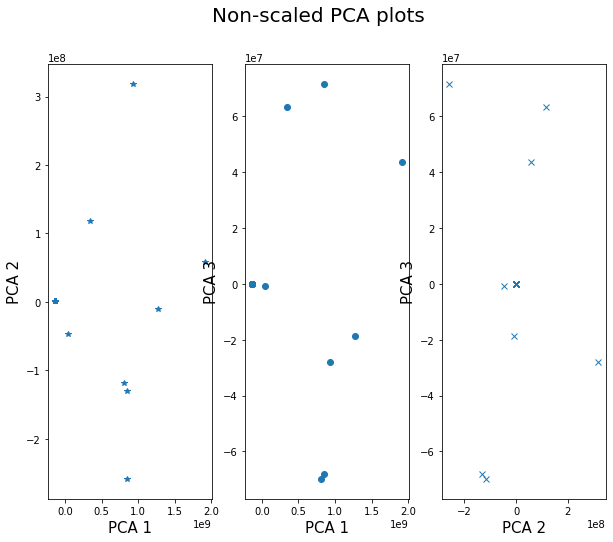

In [23]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,
                                  sharex=False,
                                  sharey=False,
                                  figsize=(10,8))
ax1.plot(noScale_PCA[:,0],noScale_PCA[:,1],'*')
ax1.set_xlabel('PCA 1', fontsize=15)
ax1.set_ylabel('PCA 2', fontsize=15)
ax2.plot(noScale_PCA[:,0],noScale_PCA[:,2],'o')
ax2.set_xlabel('PCA 1', fontsize=15)
ax2.set_ylabel('PCA 3', fontsize=15)
ax3.plot(noScale_PCA[:,1],noScale_PCA[:,2],'x')
ax3.set_xlabel('PCA 2', fontsize=15)
ax3.set_ylabel('PCA 3', fontsize=15)
fig.suptitle('Non-scaled PCA plots', fontsize=20)

Text(0.5, 0.98, 'Scaled PCA plots')

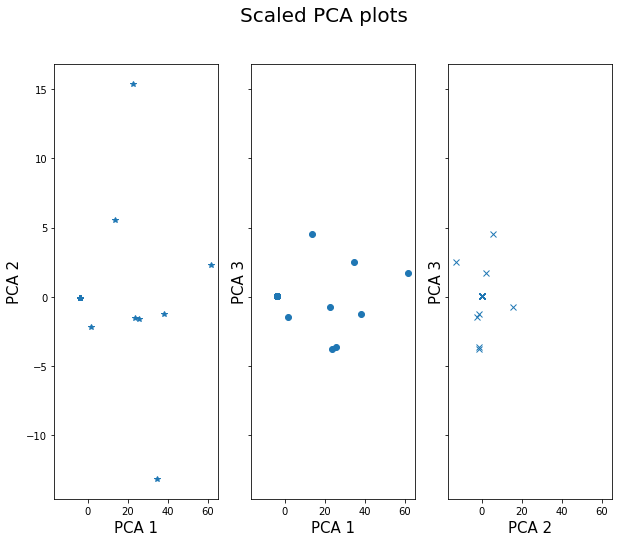

In [24]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,
                                  sharex=True,
                                  sharey=True,
                                  figsize=(10,8))
ax1.plot(Scaled_PCA[:,0],Scaled_PCA[:,1],'*')
ax1.set_xlabel('PCA 1', fontsize=15)
ax1.set_ylabel('PCA 2', fontsize=15)
ax2.plot(Scaled_PCA[:,0],Scaled_PCA[:,2],'o')
ax2.set_xlabel('PCA 1', fontsize=15)
ax2.set_ylabel('PCA 3', fontsize=15)
ax3.plot(Scaled_PCA[:,1],Scaled_PCA[:,2],'x')
ax3.set_xlabel('PCA 2', fontsize=15)
ax3.set_ylabel('PCA 3', fontsize=15)
fig.suptitle('Scaled PCA plots', fontsize=20)

In [25]:
principalDf = pd.DataFrame(data = Scaled_PCA, columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf.insert(loc=0,column='Series Code', value=dropped_pivot.T.index)

In [26]:
principalDf.sort_values(by=['principal component 2'], ascending=False)

,Series Code,principal component 1,principal component 2,principal component 3
58,SP.RUR.TOTL,22.738931,15.382282,-0.760704
49,SP.POP.0014.TO,13.755345,5.568553,4.496460
57,SP.POP.TOTL,61.510193,2.293035,1.736689
59,SP.RUR.TOTL.ZS,-4.098190,-0.065073,0.038671
45,SP.ADO.TFRT,-4.098267,-0.065547,0.039339
...,...,...,...,...
51,SP.POP.1564.TO,37.853633,-1.215180,-1.228159
19,SL.EMP.TOTL,23.394046,-1.519950,-3.758887
38,SL.TLF.TOTL.IN,25.673954,-1.584242,-3.655823
53,SP.POP.65UP.TO,1.702189,-2.192327,-1.453724


In [27]:
df[df['Series Code'] == principalDf.sort_values(by=['principal component 2'],
                                                ascending=False).values[0,0]].sort_values(by=['2016 [YR2016]'],
                                                                                          ascending=False).values[0,3]

'Rural population'

In [28]:
principalDf.sort_values(by=['principal component 1'], ascending=False)

,Series Code,principal component 1,principal component 2,principal component 3
57,SP.POP.TOTL,61.510193,2.293035,1.736689
51,SP.POP.1564.TO,37.853633,-1.215180,-1.228159
60,SP.URB.TOTL,34.671749,-13.155241,2.536338
38,SL.TLF.TOTL.IN,25.673954,-1.584242,-3.655823
19,SL.EMP.TOTL,23.394046,-1.519950,-3.758887
...,...,...,...,...
6,NY.GDP.MKTP.KD.ZG,-4.099431,-0.065967,0.038964
27,SL.FAM.WORK.MA.ZS,-4.099436,-0.065955,0.038947
48,SP.DYN.TFRT.IN,-4.099438,-0.065971,0.038972
10,SL.EMP.MPYR.FE.ZS,-4.099448,-0.065972,0.038933


### 4. T-SNE
- Perform T-SNE on the scaled data with 2 components
- Plot the embeddings results. Add a text label for each point to make it possible to interpret the results. It will not be possible to read all, but try to make it useful, see the attached image as an example!
- Highlight Hungary, Greece, Norway, China, Russia (HUN, GRC, NOR, CHN, RUS)! Which countries are the closest one to Hungary and Greece?
-------

In [29]:
from sklearn.manifold import TSNE

In [30]:
tsne = TSNE(n_components=2)

In [31]:
scalePivot_orig  = StandardScaler().fit_transform(dropped_pivot) #standardising the data, rescaling
Scaled_TSNE = tsne.fit_transform(scalePivot_orig)

In [32]:
print('Greece: %i' %dropped_pivot.reset_index()[dropped_pivot.index == 'GRC'].index[0])
gr_idx = dropped_pivot.reset_index()[dropped_pivot.index == 'GRC'].index[0]
print('Hungary: %i' %dropped_pivot.reset_index()[dropped_pivot.index == 'HUN'].index[0])
hun_idx = dropped_pivot.reset_index()[dropped_pivot.index == 'HUN'].index[0]
print('China: %i' %dropped_pivot.reset_index()[dropped_pivot.index == 'CHN'].index[0])
ch_idx = dropped_pivot.reset_index()[dropped_pivot.index == 'CHN'].index[0]
print('Norway: %i' %dropped_pivot.reset_index()[dropped_pivot.index == 'NOR'].index[0])
nor_idx = dropped_pivot.reset_index()[dropped_pivot.index == 'NOR'].index[0]
print('Russia: %i' %dropped_pivot.reset_index()[dropped_pivot.index == 'RUS'].index[0])
rus_idx = dropped_pivot.reset_index()[dropped_pivot.index == 'RUS'].index[0]

Greece: 56
Hungary: 62
China: 28
Norway: 109
Russia: 123


Text(0, 0.5, 'T-SNE 2')

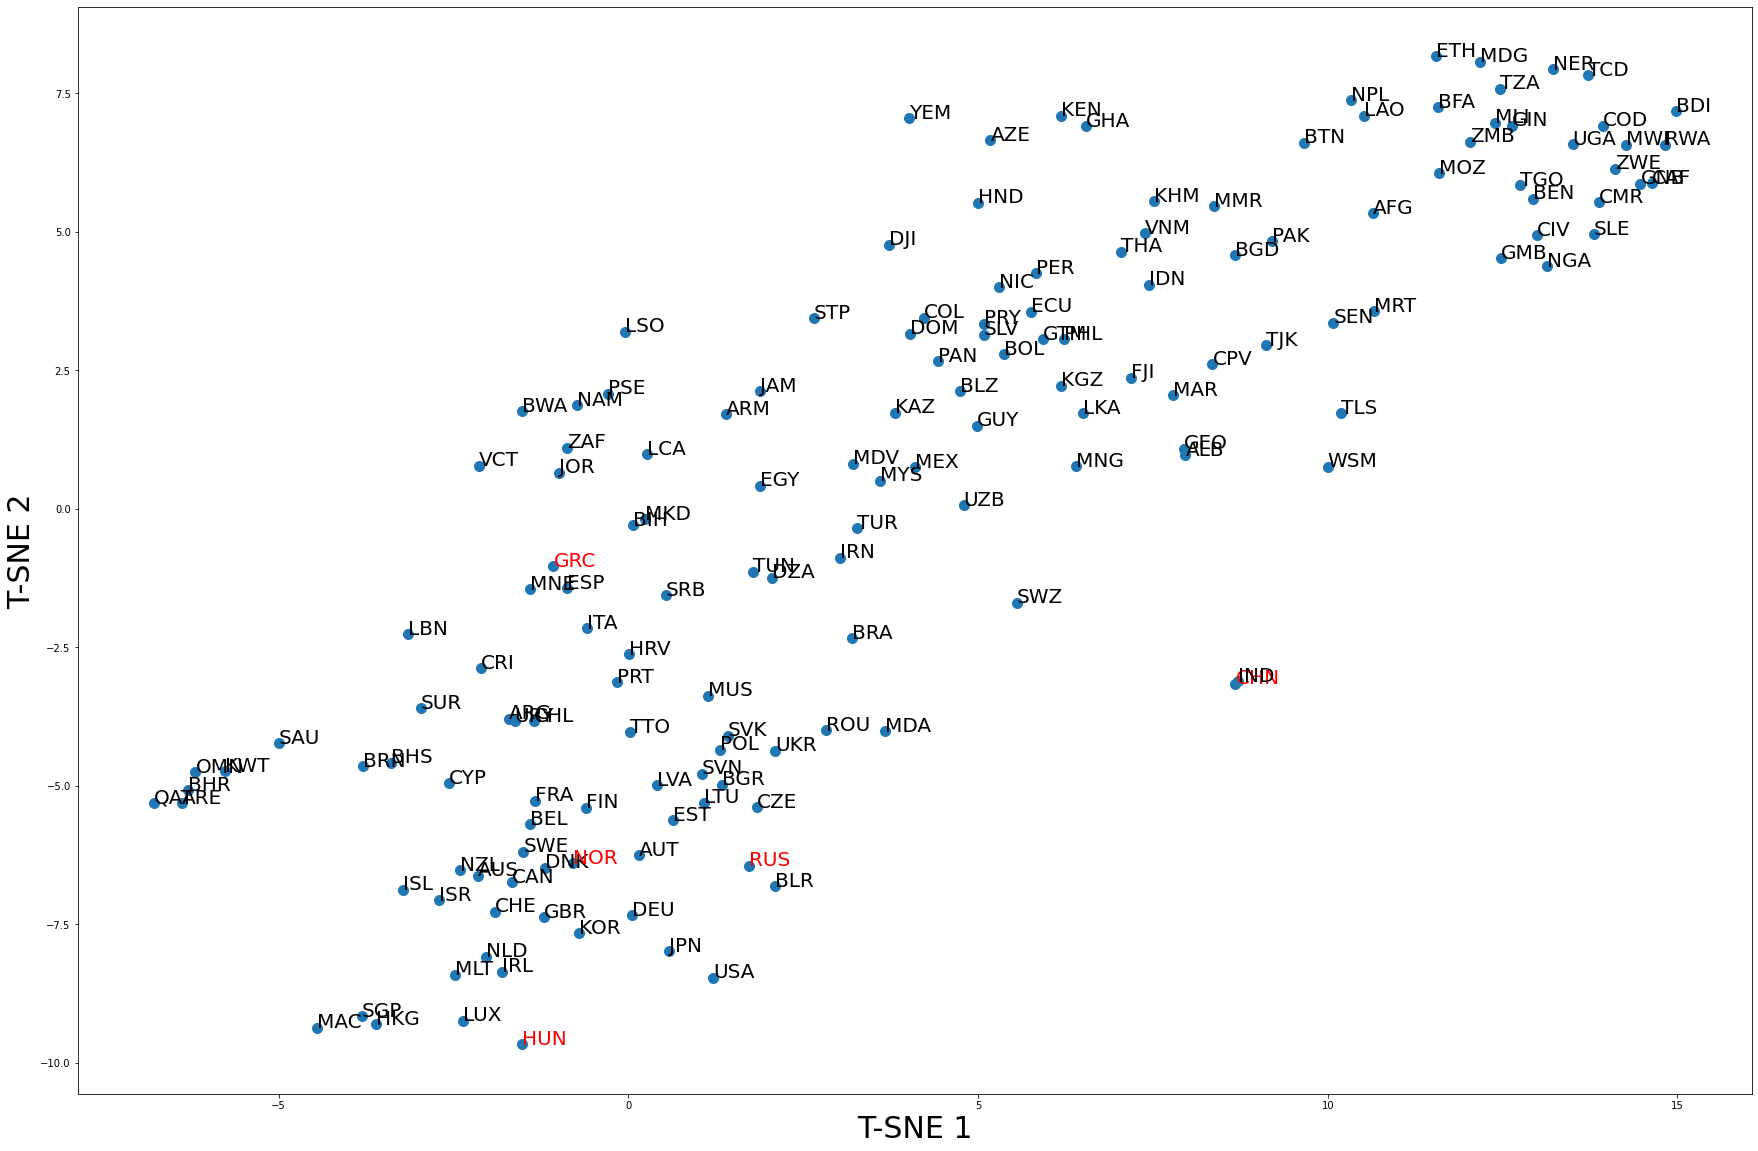

In [33]:
plt.figure(figsize=(30, 20))
plt.plot(Scaled_TSNE[:,0],Scaled_TSNE[:,1],'o', markersize=10)
for i in range(np.shape(dropped_pivot.index[:])[0]):
    if(np.any(dropped_pivot.index[i] == np.array(['GRC','RUS', 'NOR', 'CHN', 'HUN']))):
        plt.annotate(dropped_pivot.index[i],
                 (Scaled_TSNE[i,0], Scaled_TSNE[i,1]),
                fontsize=20,
                    color='red')
    else:
            plt.annotate(dropped_pivot.index[i],
             (Scaled_TSNE[i,0], Scaled_TSNE[i,1]),
            fontsize=20)
plt.xlabel('T-SNE 1', fontsize=30)
plt.ylabel('T-SNE 2', fontsize=30)

### 5. Hierarchical and K-Means clustering
- Perform hierarchical clustering on the filtered and scaled data (hint: use seaborn)
- Try to plot in a way that all country's name is visible
- Perform K-Means clustering on the filtered and scaled data with 4 clusters.
- Make a plot with text label for each point as in the previous excersice but use different color for every cluster.
- Write down your impressions that you got from these two plots! Which cluster are China and Hungary in?
----

In [34]:
from sklearn.cluster import KMeans
import seaborn as sns

In [35]:
k_Df = pd.DataFrame(data = scalePivot_orig, columns = dropped_pivot.columns, index=dropped_pivot.index)

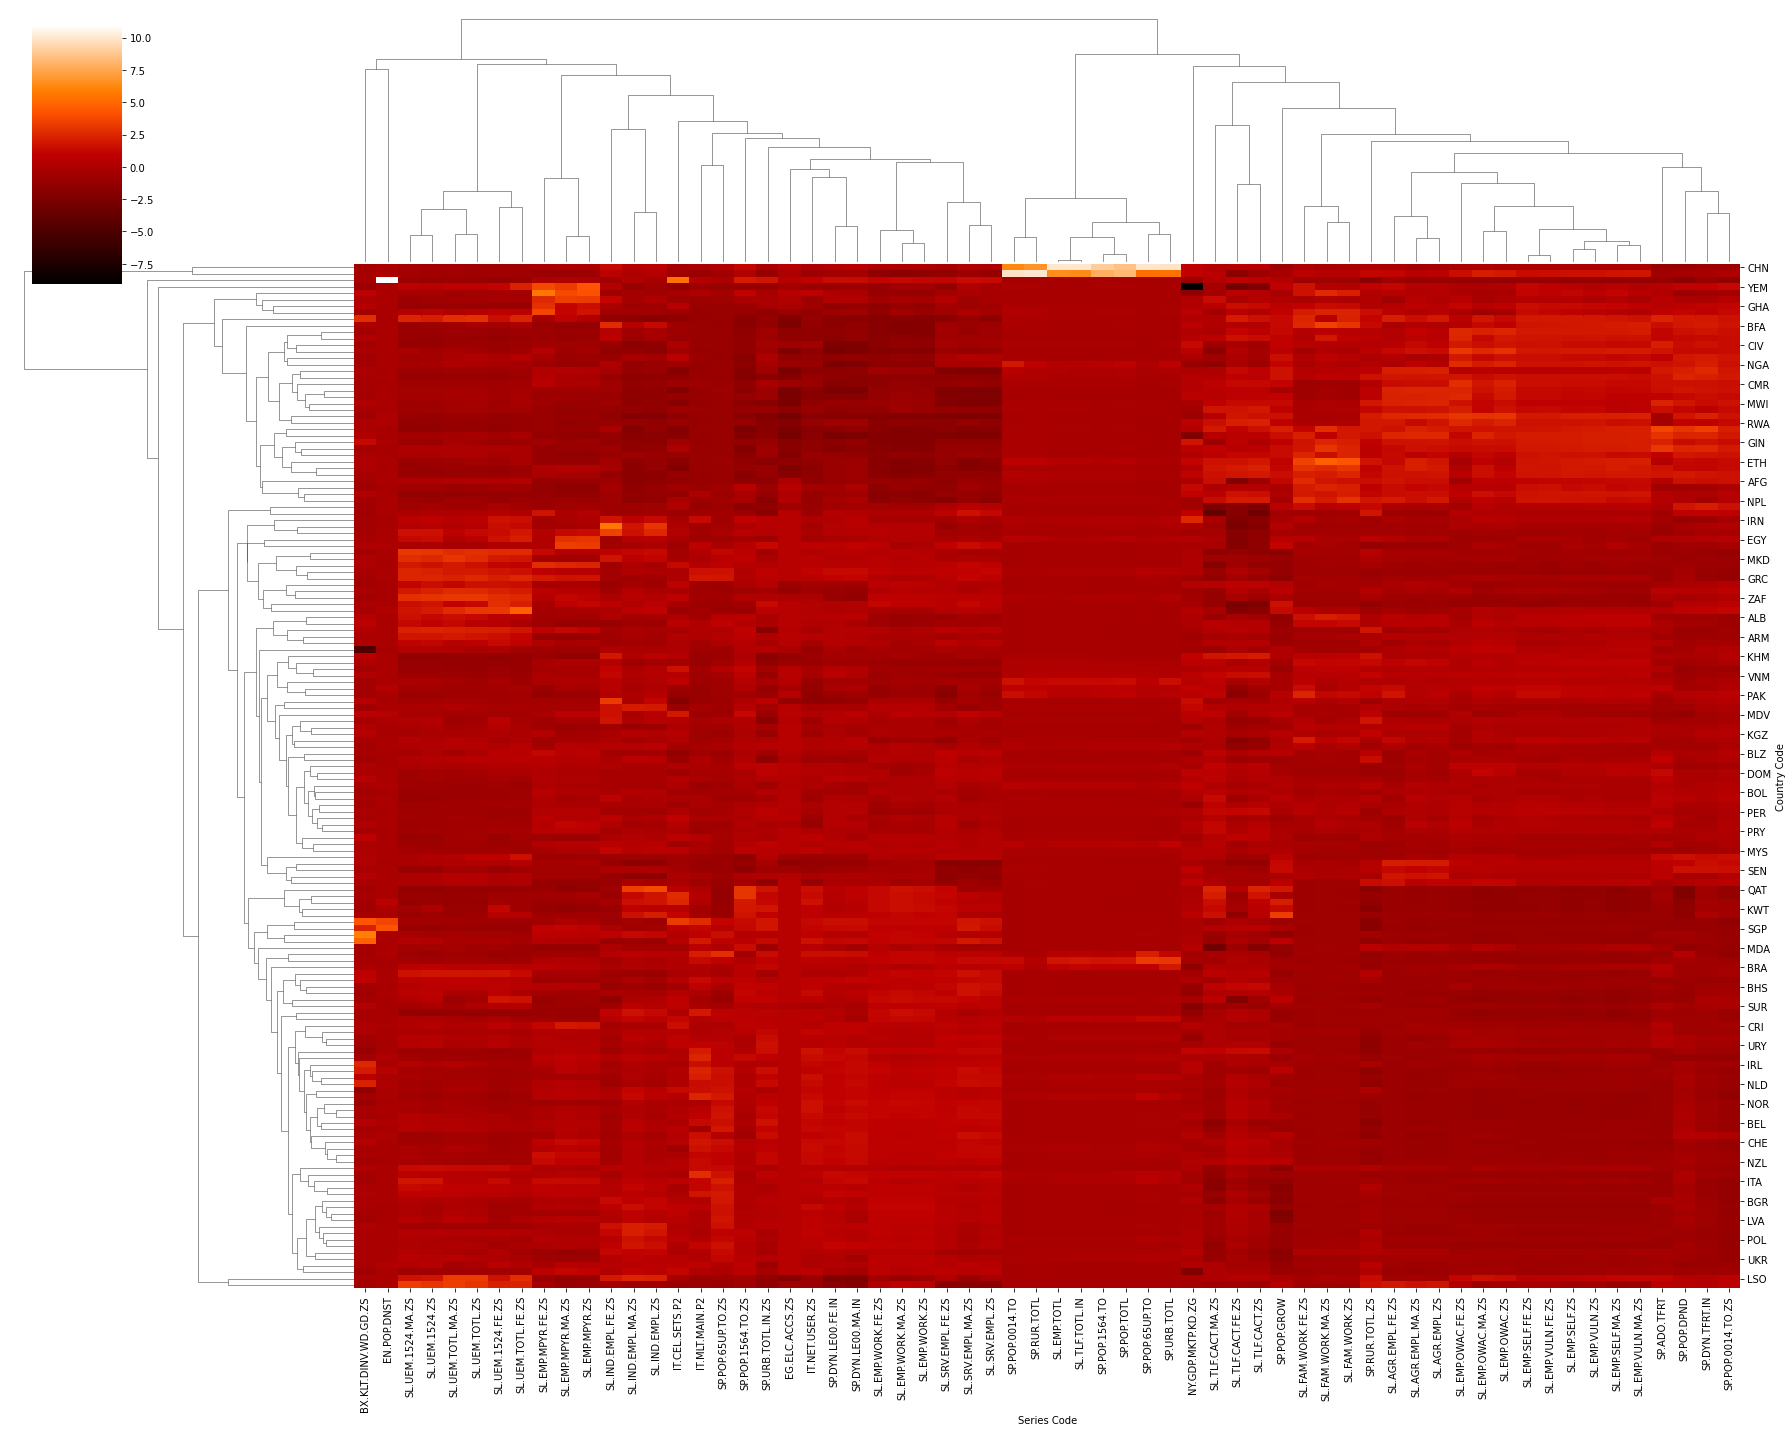

In [36]:
g = sns.clustermap(k_Df, cmap = 'gist_heat', figsize=(25,20))


In [37]:
km = KMeans(n_clusters=4)
fit_km = km.fit(k_Df)

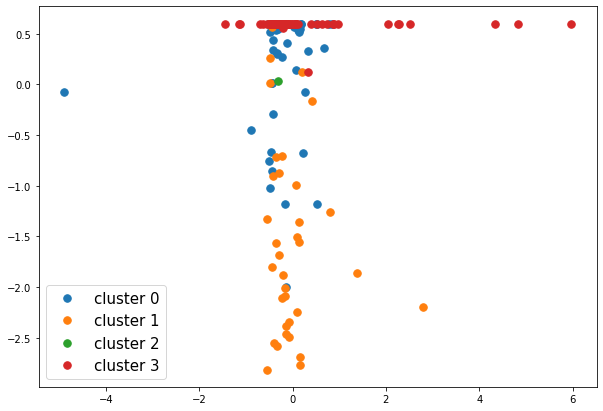

In [38]:
plt.figure(figsize=(10, 7))
for i in range(4):
    plt.plot(scalePivot_orig[fit_km.labels_==i,0],
             scalePivot_orig[fit_km.labels_==i,1],
             '.',
             label='cluster %i' %i,
            markersize=15)
plt.legend(fontsize=15)

In [39]:
print('China is in cluster %i' %fit_km.labels_[ch_idx])
print('Hungary is in cluster %i' %fit_km.labels_[hun_idx])

China is in cluster 2
Hungary is in cluster 3
